In [1]:
# import modules

from pathlib import Path
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords


import matplotlib.pyplot as plt

# data analysis and manipulation tool 
import pandas as pd
# natural language token analyzer package
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# define data location
data_dir = Path().resolve().parent / "data"

[nltk_data] Downloading package punkt to /home/miss-luu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/miss-
[nltk_data]     luu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# creating one big dataframe consisting of arguments labels and keypoints (only with true label)

# read data for training
df_arguments_train = pd.read_csv(data_dir / "arguments_train.csv",encoding="utf-8")
df_key_points_train = pd.read_csv(data_dir / "key_points_train.csv",encoding="utf-8")
df_key_points_train = df_key_points_train[['key_point','key_point_id']]
df_labels_train = pd.read_csv(data_dir / "labels_train.csv")

# merge labels with keypoints
df_labels_train=df_labels_train.merge(df_key_points_train,on='key_point_id')

In [3]:
len(df_labels_train.index)

20635

# Analysieren mit Label 1 - matching

In [4]:
# filter false labels
df_labels_train=df_labels_train[df_labels_train['label']!=0]

# merge labels with arguments
df_arguments_train=df_arguments_train.merge(df_labels_train,on='arg_id')
df_arguments_labels_key_points_train = df_arguments_train.copy()
df_arguments_labels_key_points_train

,arg_id,argument,topic,stance,key_point_id,label,key_point
0,arg_0_1,A patient should be able to decide when they h...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...
1,arg_0_2,a person has the right to end their suffering ...,Assisted suicide should be a criminal offence,-1,kp_0_1,1,Assisted suicide reduces suffering
2,arg_0_3,a person should have the dignity to choose how...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...
3,arg_0_4,a person should have the right to be able to c...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...
4,arg_0_5,a person should have the right to die on their...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...
...,...,...,...,...,...,...,...
4255,arg_27_215,We should subsidize vocational education becau...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...
4256,arg_27_218,we should subsidize vocational education to en...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...
4257,arg_27_219,We should subsidize vocational education to su...,We should subsidize vocational education,1,kp_27_6,1,vocational education better fits many students
4258,arg_27_220,While many who graduate from universities stru...,We should subsidize vocational education,1,kp_27_5,1,vocational education is a good career choice


In [5]:
topics = df_arguments_train.topic.unique()
print(topics)
arguments = df_arguments_train.argument.unique()
print(arguments)

['Assisted suicide should be a criminal offence'
 'Homeschooling should be banned'
 'The vow of celibacy should be abandoned' 'We should abandon marriage'
 'We should abolish capital punishment'
 'We should abolish intellectual property rights'
 'We should adopt atheism' 'We should adopt libertarianism'
 'We should ban human cloning' 'We should ban private military companies'
 'We should ban the use of child actors'
 'We should close Guantanamo Bay detention camp'
 'We should end mandatory retirement'
 'We should fight for the abolition of nuclear weapons'
 'We should fight urbanization' 'We should introduce compulsory voting'
 'We should legalize cannabis' 'We should legalize prostitution'
 'We should legalize sex selection' 'We should prohibit flag burning'
 'We should prohibit women in combat' 'We should subsidize journalism'
 'We should subsidize space exploration'
 'We should subsidize vocational education']
['A patient should be able to decide when they have had enough "care".'
 

# Daten für ein Topic und Arguments, die zum Topic gehören

In [6]:
def select_topic(df_arguments_labels_key_points_train, topic):
    df_topic = df_arguments_labels_key_points_train[df_arguments_labels_key_points_train['topic']==topic]
    args = df_topic.argument.unique()
    d_args = {}
    for arg in args:
        df = df_topic[df_topic['argument']==arg]
        keypoints_1 = list(df[df['stance']==1].key_point)
        keypoints_ = list(df[df['stance']==-1].key_point)
        d_args[arg] = {"stance 1": keypoints_1, "stance -1":keypoints_}
    return d_args
topic = "Homeschooling should be banned"
d = select_topic(df_arguments_labels_key_points_train, topic)
for k, v in d.items():
    print(k)
    print(v)
    print(100*"=")

a parent knows best what is good for their kid
{'stance 1': [], 'stance -1': ['Parents should be permitted to choose the education of their children']}
a parent knows their child better than anyone else and can personalize their teaching to that childs personality
{'stance 1': [], 'stance -1': ["Homeschools can be personalized to the child's pace/needs"]}
children can get more one on one assistance when they are homeschooled and can learn at their own pace.
{'stance 1': [], 'stance -1': ["Homeschools can be personalized to the child's pace/needs", 'Parents will have more ability to pay-attention/educate their child']}
Children who are bullied in school can benefit greatly from switching to a homeschool environment where the parents have more control over who their children socialize with.
{'stance 1': [], 'stance -1': ['Mainstream schools have a lot of violence/bullying']}
children who homeschool have surpassed their public school peers in standardized testing by an overall 10% better 

In [7]:
# tokenizes the arguments and appends them to the unified data_frame
df_arguments_labels_key_points_train['argument_tokens'] = df_arguments_labels_key_points_train['argument'].apply(lambda row: nltk.regexp_tokenize(row, r'\w+'))

In [8]:
# tokenizes the keypoints and appends them to the unified data_frame
df_arguments_labels_key_points_train['key_point_tokens'] = df_arguments_labels_key_points_train['key_point'].apply(lambda row: nltk.regexp_tokenize(row, r'\w+'))

In [9]:
# tokenizes the topics and appends them to the unified data_frame
df_arguments_labels_key_points_train['topic_tokens'] = df_arguments_labels_key_points_train['topic'].apply(lambda row: nltk.regexp_tokenize(row, r'\w+'))

df_arguments_labels_key_points_train

,arg_id,argument,topic,stance,key_point_id,label,key_point,argument_tokens,key_point_tokens,topic_tokens
0,arg_0_1,A patient should be able to decide when they h...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[A, patient, should, be, able, to, decide, whe...","[People, should, have, the, freedom, to, choos...","[Assisted, suicide, should, be, a, criminal, o..."
1,arg_0_2,a person has the right to end their suffering ...,Assisted suicide should be a criminal offence,-1,kp_0_1,1,Assisted suicide reduces suffering,"[a, person, has, the, right, to, end, their, s...","[Assisted, suicide, reduces, suffering]","[Assisted, suicide, should, be, a, criminal, o..."
2,arg_0_3,a person should have the dignity to choose how...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[a, person, should, have, the, dignity, to, ch...","[People, should, have, the, freedom, to, choos...","[Assisted, suicide, should, be, a, criminal, o..."
3,arg_0_4,a person should have the right to be able to c...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[a, person, should, have, the, right, to, be, ...","[People, should, have, the, freedom, to, choos...","[Assisted, suicide, should, be, a, criminal, o..."
4,arg_0_5,a person should have the right to die on their...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[a, person, should, have, the, right, to, die,...","[People, should, have, the, freedom, to, choos...","[Assisted, suicide, should, be, a, criminal, o..."
...,...,...,...,...,...,...,...,...,...,...
4255,arg_27_215,We should subsidize vocational education becau...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...,"[We, should, subsidize, vocational, education,...","[vocational, education, is, beneficial, for, t...","[We, should, subsidize, vocational, education]"
4256,arg_27_218,we should subsidize vocational education to en...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...,"[we, should, subsidize, vocational, education,...","[vocational, education, is, beneficial, for, t...","[We, should, subsidize, vocational, education]"
4257,arg_27_219,We should subsidize vocational education to su...,We should subsidize vocational education,1,kp_27_6,1,vocational education better fits many students,"[We, should, subsidize, vocational, education,...","[vocational, education, better, fits, many, st...","[We, should, subsidize, vocational, education]"
4258,arg_27_220,While many who graduate from universities stru...,We should subsidize vocational education,1,kp_27_5,1,vocational education is a good career choice,"[While, many, who, graduate, from, universitie...","[vocational, education, is, a, good, career, c...","[We, should, subsidize, vocational, education]"


# Das Ziel des Tasks ist:
- zu jedem Argument sollen Keypoints per stance mit Ranking zugeordnet werden. Deshalb ist es sinnvoll, die Verteilung/Analyse mit n-grams mit diesm Ziel in der Verbindung steht. Das heißt, wir sollen versuchen, die Wörterverteilung/N-Grams Verteilung zwischen Argument und Keypoints zu beobachten

In [22]:
# visualize most common tokens
import numpy as np
def visualize_word_frequency(df_arguments,top_k=50,token_kind='argument_tokens'):
    fig,ax=plt.subplots(figsize=(8,6))
    c=Counter()
    for _,argument in df_arguments.iterrows():
        c.update(argument[token_kind])


    values,counts=zip(*c.most_common(top_k))    
    plt.bar(values,counts)

    plt.xticks(rotation=90)
    fig.savefig('pictures/'+token_kind+'.png') 
    plt.show()
    
    return values

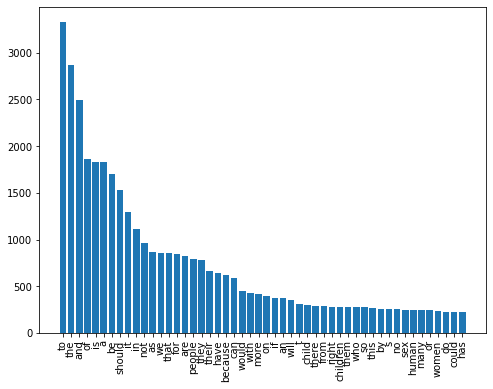

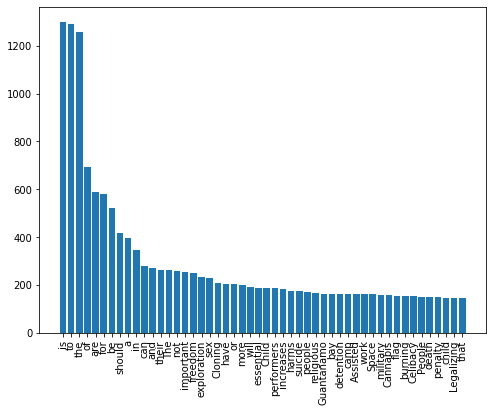

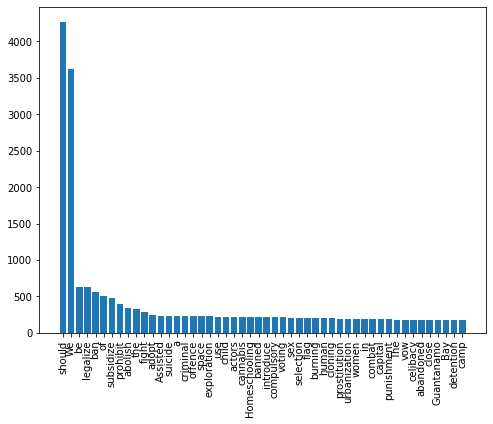

In [23]:
# most common tokens in arguments and keypoints and topics with stopwords
argument_words=visualize_word_frequency(df_arguments_labels_key_points_train,50,'argument_tokens')
key_point_words=visualize_word_frequency(df_arguments_labels_key_points_train,50,'key_point_tokens')
topic_words=visualize_word_frequency(df_arguments_labels_key_points_train,50,'topic_tokens')

In [12]:
# remove stopwords
stopword = set(stopwords.words('english'))
df_arguments_labels_key_points_train['argument_tokens_not_stopwords'] = df_arguments_labels_key_points_train['argument_tokens'].apply(lambda tokens: [token for token in tokens if token not in stopword])

df_arguments_labels_key_points_train['key_point_tokens_not_stopwords'] = df_arguments_labels_key_points_train['key_point_tokens'].apply(lambda tokens: [token for token in tokens if token not in stopword])

df_arguments_labels_key_points_train['topic_tokens_not_stopwords'] = df_arguments_labels_key_points_train['topic_tokens'].apply(lambda tokens: [token for token in tokens if token not in stopword])

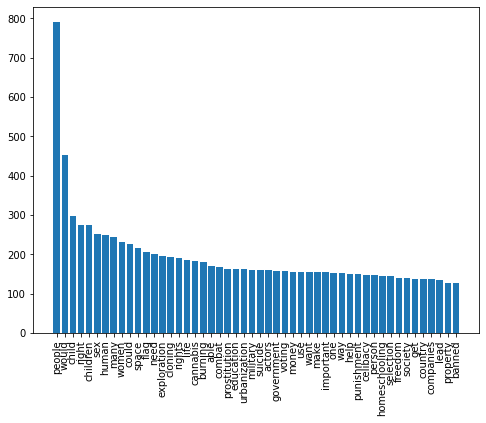

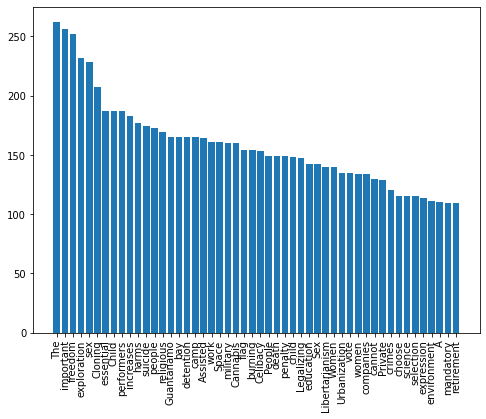

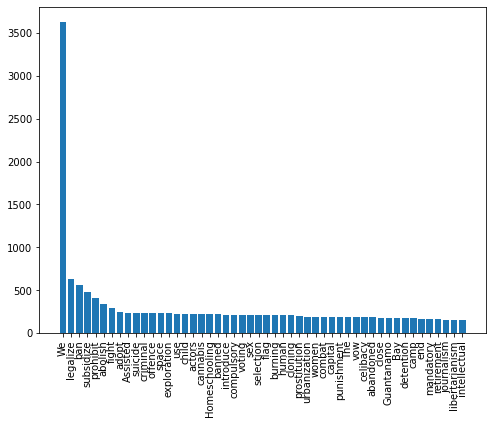

In [24]:
# most common tokens in arguments and keypoints without stopwords
argument_words_without_stopwords=visualize_word_frequency(df_arguments_labels_key_points_train,50,'argument_tokens_not_stopwords')
key_point_words_without_stopwords=visualize_word_frequency(df_arguments_labels_key_points_train,50,'key_point_tokens_not_stopwords')
topic_words_without_stopwords=visualize_word_frequency(df_arguments_labels_key_points_train,50,'topic_tokens_not_stopwords')

# Analysieren mit N-Grams

In [14]:
def tuple_ngram_to_string(l):
    nl = []
    for e in l: 
        nl.append("_".join(e))
    return nl

In [15]:
# generates 3_grams and 2_grams for arguments
df_arguments_labels_key_points_train['argument_2_grams'] = df_arguments_labels_key_points_train['argument_tokens'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,2))))
df_arguments_labels_key_points_train['argument_3_grams'] = df_arguments_labels_key_points_train['argument_tokens'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,3))))

In [16]:
# generates 3_grams and 2_grams for key_points
df_arguments_labels_key_points_train['key_point_2_grams'] = df_arguments_labels_key_points_train['key_point_tokens'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,2))))
df_arguments_labels_key_points_train['key_point_3_grams'] = df_arguments_labels_key_points_train['key_point_tokens'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,3))))

In [17]:
# generates 3_grams and 2_grams for topics
df_arguments_labels_key_points_train['topic_2_grams'] = df_arguments_labels_key_points_train['topic_tokens'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,2))))
df_arguments_labels_key_points_train['topic_3_grams'] = df_arguments_labels_key_points_train['topic_tokens'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,3))))

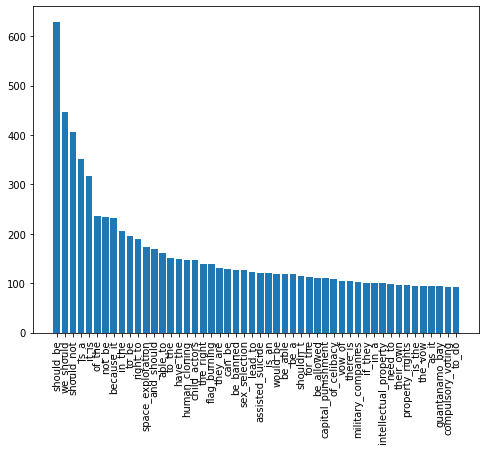

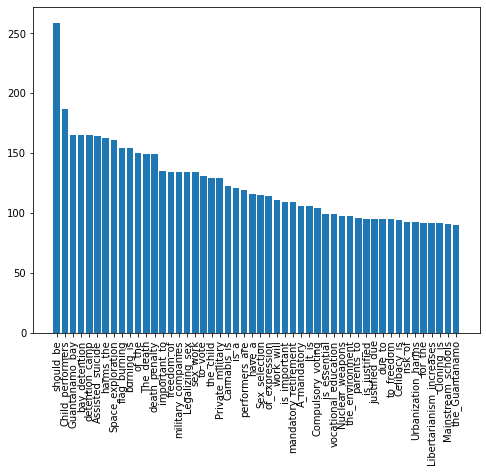

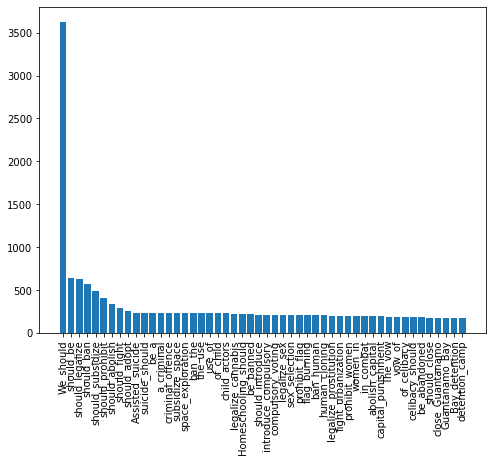

In [25]:
# most common 2_grams in arguments and keypoints 
argument_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'argument_2_grams')
key_point_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'key_point_2_grams')
topic_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'topic_2_grams')

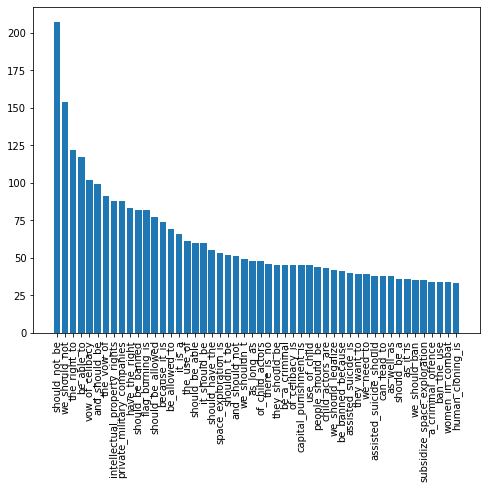

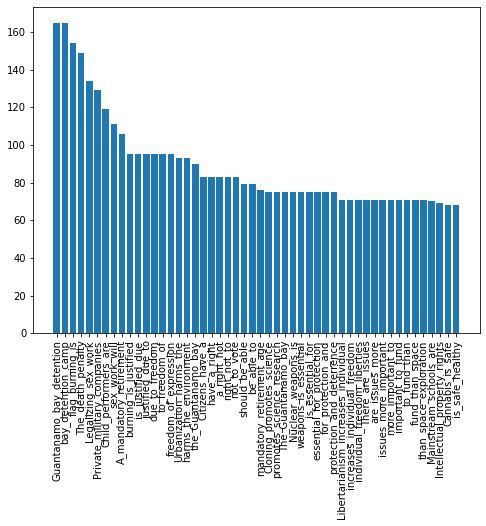

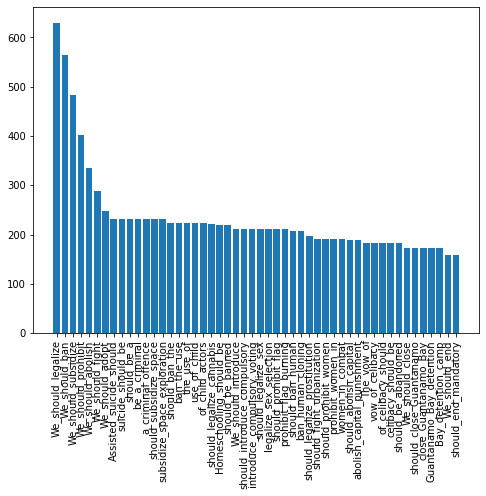

In [26]:
# most common 3_grams in arguments and keypoints 
argument_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'argument_3_grams')
key_point_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'key_point_3_grams')
topic_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'topic_3_grams')

# Lemmatisierung
- lemmatisieren
- token
- 2-grams
- 3-grams

In [20]:
# labels_dev = pandas.read_csv(data_dir / "labels_dev.csv")
# labels_dev

In [48]:
# labels_train = pandas.read_csv(data_dir / "labels_train.csv")
# labels_train